**Chapter 6 – Decision Trees**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582/blob/main/03_Decision_Trees.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Random Forests

In this exercise you will be using the [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) dataset. You can see a plot below. 


In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

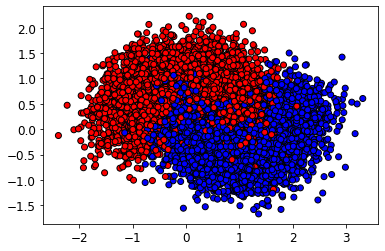

In [4]:
from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_bright, edgecolors="k");

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

8000

In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_moons = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=42, splitter='best')
tree_moons.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score

y_pred_moons = tree_moons.predict(X_test)
accuracy_score(y_test, y_pred_moons)

0.8695

The decision tree trained with all data has an accuracy as shown above.
Now we will build a forest consisting of trees.

We will be building 100 `DecisionTreeClassifier`s.
First we do a train-test-split to get training and test data.

As you can see, the training data has a size of 8000 instances.
Let's generate 1000 subsets (mini-sets) of `X_train`, each containing 100 instances selected randomly.
Then we will train a separate tree on each of the mini-sets.

## Task 6

Grow a forest.
You will have to get the following done, the way you implement it is your choice:

- Split `X_train` into 1000 subsets, each containing 100 instances selected randomly. You can use sklearn's [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) for this. 
- Train one [Decision Tree](https://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on each subset. The hyperparameter values below work well:
```python
class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=42, splitter='best'
```
You might need `from sklearn.base import clone`. To clone the tree 1000 times.
- calculate the accuracy on the test data `X_test`, `y_test` for each tree. What is the mean accuracy?
- Build a forest: For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy's `mode()` function for this). This gives you _majority-vote predictions_ over the test set. What is the accuracy of your fores? You should get a slightly better accuracy than the one tree trained on all training data.


If you struggle with this task for too long, then you can find the solution [here](https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb) under 8 (bottom of the notebook).
Try not to copy all of the code, but at least write some of it yourself.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [9]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100
mini_sets = []

In [10]:
# solution
rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))



In [11]:
tree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, 
                       random_state=42, splitter='best')

In [12]:
from sklearn.base import clone

forest = [clone(tree) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

In [13]:
accuracy_scores[0:10]

[0.7985, 0.836, 0.8065, 0.842, 0.7935, 0.8315, 0.7825, 0.7935, 0.8085, 0.829]

In [14]:
np.mean(accuracy_scores)

0.8054499999999999

In [15]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)

In [16]:
Y_pred.shape

(1000, 2000)

In [17]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [18]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.872

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above this 